<a href="https://colab.research.google.com/github/chierighini/notes/blob/main/applied_data_science_python4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Sicence with Python, Part 4

## Linear and Multiple Linear Regression
In linear regression we use a set of data points to train our model to make predictions.

### Linear Regression
Linear Regression refers to one variable being used to make a prediction.

### Multiple Linear Regression
Multiple Linear regression is using two or more variables to make your prediction.

## Model Evaluation using Visualization

### Regression Plots
Regression plots are a good estimate of the realtionship of the variables, positive or negative, and the strength of the correlation. The dependant variable is placed on the vertical axis and the independent one is placed on the horizontal axis.

`seaborn` has a method for regression plots: `regplot(x=hor_var,y=vert_var,data=df_name)`

### Residual Plot
In the residual plot we take the predicted value and subtract the actual value and plotting it accordingly. If the distribution of the plots is dispersed around the horizontal axis, then the linear model is appropriate for your variable. If not, a curved residual plot (U-shaped) or any other non-random dsitributions for example, then a non linear model is more appropriate.

`seaborn` also has a method for residual plots: `residplots(independent_var,target_var)`

### Distribution Plots
A distribution plot counts the predicted values versus the actual values, and it's a very useful tool for plots that have more than one independent variable.

It enables you to compare the actual values to the predicted ones by putting them into a distribution.

## Polynomial Regression and Pipelines
A special case of the general linear regression model, and very useful for describing curvilinear relationships.

### Polynomial Regression
We can use this in order to fit our model into a polynomial function and therefore, making our predictions more precise. An example of a polynomial function is the quadratic function. They can be put in whatever order is needed to fit our needs.

`numpy` has a method for this called `polyfit`.

For multi-dimensional polynomial regression we must use `sklearn` module to preprocess and create a polynomial feature object. The `preprocessing` module is used to simplify many tasks.

`sklearn` documentation: https://scikit-learn.org/stable/modules/preprocessing.html

### Pipeline
Pipelines are used to simplify our code. There is a `pipeline` module on `sklearn`. Pipelines will take all of our transforms and make them sequentially.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

## Measures for In-Sample Evaluation
Ways to verify how well our model fits numerically.

The most common ways of checking the fit of the model are:
* MSE (Mean Square Error)
* R-squared

### MSE
To find the MSE we find the difference between the actual value and the predicted value and square it. Then we sum all the differences for all the values and divide them by the number of samples.

`sklean.metrics` has a function for doing just that: `mean_squared_error`

### R-squared
Also called coeficient of determination, is a measure to see how well the data fits the regression line. R² is a percentage of variation of the target variable explained by the linear model.

R² is given by the following equation: 
>$R^2=1- \frac{MSE \ of \ regression \ line}{MSE \ of \ the \ average \ data}$

## Lab Exercises

###Setup

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv

In [ ]:
df = pd.read_csv("/content/automobileEDA.csv")
df.head()

### Linear Regression and Multiple Linear Regression

#### Linear Regression

First we import the `LinearRegression` module from `sklearn.linear_model`:

In [5]:
from sklearn.linear_model import LinearRegression

Then we create a linear regression object:

In [ ]:
lm = LinearRegression()
lm

We're going to see how the `highway-mpg` variable affects the price of the car.

In [7]:
X = df[['highway-mpg']]
Y = df['price']

In the horizontal axis, or x-axis we have the independent variable, and in the vertical axis, or y-axis we have the target variable.

Now we fit the linear model:

In [8]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

And with that we can make a prediction based off of the fit:

In [9]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

The following are the values for the a and b in our $y=a+bx$ equation

In [10]:
lm.intercept_

38423.3058581574

In [11]:
lm.coef_

array([-821.73337832])

Putting them together we get:
>$y=38423.31 - 821.73 x$

##### Exercise
Create a linear regression object, train the model using `engine-size` as the independent variable and `price` as the dependent variable, find the equation.

In [12]:
lm1 = LinearRegression()
lm1 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X = df[['engine-size']]
Y = df['price']

In [15]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lm.intercept_


-7963.338906281042

In [17]:
lm.coef_

array([166.86001569])

With that information, we can conclude that the equation is:
>$y=-7963.34 + 166.86 x$

#### Multiple Linear Regression

Now to do the same using the following variables:
* Horsepower
* Curb-weight
* Engine-size
* Highway-mpg

We put them all in the same variable:


In [21]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

And fit them with the target variable:

In [23]:
lm.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now for our intercept and coeficients:

In [24]:
lm.intercept_

-15806.62462632922

In [25]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

The resulting equation will have the coeficients from `lm.coef_` multiplying the variables in the order they were inserted in `Z`:

>$Price = -15678.742628061467 + 52.65851272horsepower + 4.69878948curbweight + 81.95906216enginesize + 33.58258185highwaympg
$

##### Exercise
Create another regression object `lm2` that will make the same process as above but with `price`as the target and `normalized-losses` and `highway-mpg` are the predictor variables.

In [26]:
lm2 = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
Z = df[['normalized-losses','highway-mpg']]

In [28]:
lm2.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lm2.intercept_

38201.31327245728

In [30]:
lm2.coef_

array([   1.49789586, -820.45434016])

Resulting in the equation:
>$Price = 38201.31 + 1.5 normalizedlosses - 820.45 highwaympg$

### Model Evaluation using Visualization

#### Regression Plot
A good way of visualizing linear regression is to put it into a regression plot. It will show a combination of the scaterred data as dots and the line that was produced.

(0.0, 48171.417902656845)

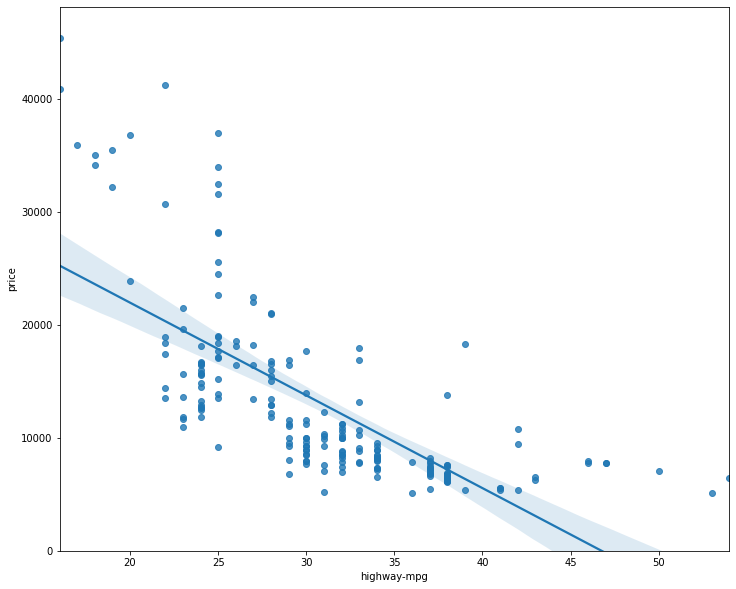

In [33]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

From the plot, it is possible to see that `price` and `highway-mpg` are negatively correlated. Let's compare it to the `peak-rpm` and `price` plot.

(0.0, 47414.1)

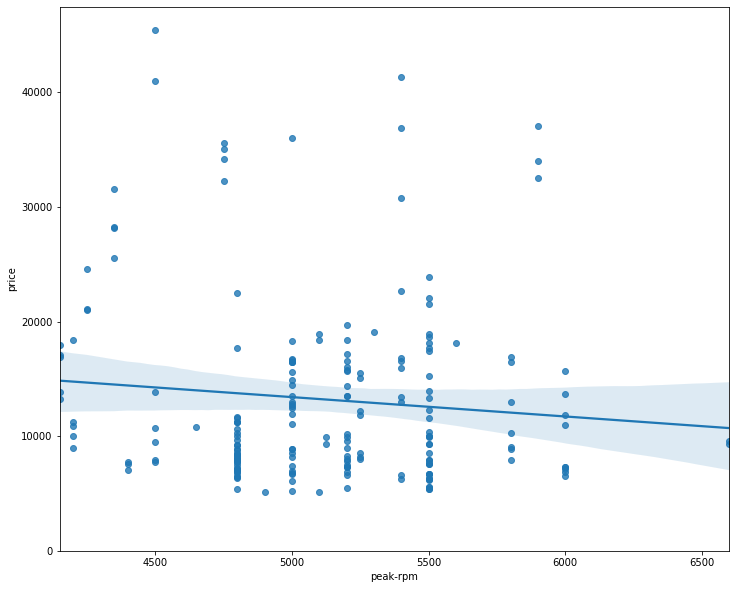

In [34]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

As we can see, the dots for `highway-mpg`are much closer to the line than the ones for `peak-rpm`, this means that linear regression is a much better fit in the first plot, than in the second. And we can clearly see that by checking the correlation between them, where `highway-mph` gives a number much closer to one than `peak-rpm`.

In [36]:
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


#### Residual Plot
A great way to visualize the variance of data. Here we must look at the spread of the residue from the predicted values and the actual values.

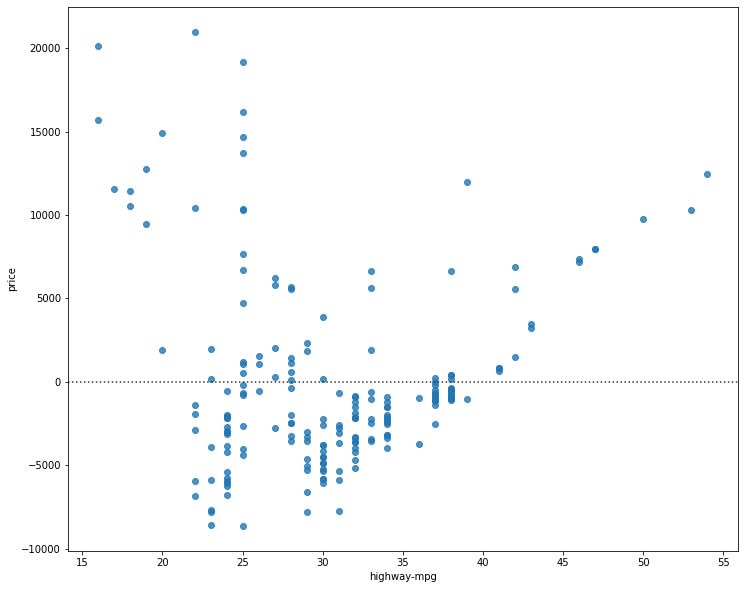

In [49]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

Since the plots are not randomly spread out around the x-axis, the linear model is not a good fit for this data.

#### Multiple Linear Regression
A good way of visualizing MLR is with the use of the use of distribution plots.

In [38]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [39]:
Y_hat = lm.predict(Z)

<Figure size 864x720 with 0 Axes>

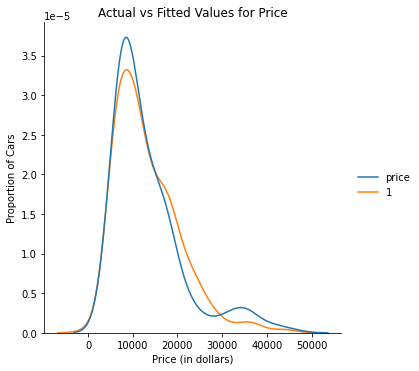

In [62]:
plt.figure(figsize=(width, height))


sns.displot([df['price'],Y_hat],kind='kde')


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Polynomial Regression and Pipelines
It is possible to get non-linear relationships by increasing the order of your predictor variables.

#### Polynomial Regression

##### 1 Feature Polynomial

In [64]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [65]:
x = df['highway-mpg']
y = df['price']

In [66]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


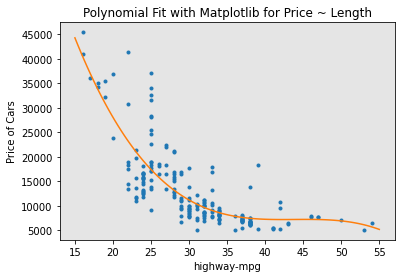

In [67]:
PlotPolly(p, x, y, 'highway-mpg')

In [68]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

##### Exercise
Make a polynomial of the 11th order using `x` and `y` from above.

In [72]:
f= np.polyfit(x,y,11)
p=np.poly1d(f)
p

poly1d([-1.24263391e-08,  4.72184893e-06, -8.02843483e-04,  8.05640304e-02,
       -5.29740982e+00,  2.39470329e+02, -7.58845740e+03,  1.68447254e+05,
       -2.56531153e+06,  2.55140622e+07, -1.49106965e+08,  3.87930088e+08])

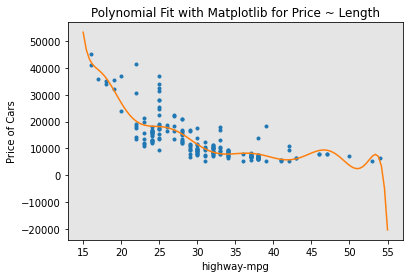

In [73]:
PlotPolly(p, x, y, 'highway-mpg')

##### More Features
The process to create a polynomial function with more than one feature is the following:

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [76]:
Z_pr=pr.fit_transform(Z)

In [77]:
Z.shape

(201, 4)

In [78]:
Z_pr.shape

(201, 15)

#### Pipeline
Pipelines simplify the steps of processing data.

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor, that way, we can make as many transformations as desired.

In [81]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [82]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [83]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [84]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

##### Exercise

In [85]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### Measures for In-Sample Evaluation
When evaluating models we not only want to visualize the data, but also a numerical way of telling its accuracy, such as $R^2$ and MSE.

$R^2$ is the measure of how close the data is to the fitted regression line.

For MSE we make a prediction and then see the difference between the predicted value and the actual value.

##### Simple Linear Regression


###### $R^2$

In [88]:
lm.fit(X, Y)
lm.score(X,Y)

0.7609686443622008

###### MSE

In [89]:
Yhat=lm.predict(X)
Yhat[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
mse = mean_squared_error(df['price'], Yhat)
mse

15021126.025174143

#### Multiple Linear Regression

#####$R^2$

In [92]:
lm.fit(Z, df['price'])
lm.score(Z, df['price'])

0.8093562806577457

#####MSE

In [95]:
Y_predict_multifit = lm.predict(Z)

In [94]:
mean_squared_error(df['price'], Y_predict_multifit)

11980366.87072649

#### Polynomial Fit

###### $R^2$

In [96]:
from sklearn.metrics import r2_score

In [97]:
r_squared = r2_score(y, p(x))
r_squared

0.7023769093756598

#####MSE

In [98]:
mean_squared_error(df['price'], p(x))

18703127.63085496

### Decision Making

When deciding on models, the highest $R^2$ value is preferrable. The opposite goes for the MSE value, which when lowest, is best.

Looking at the values for each model above, we can conclude that the MLR is the best model, since it has the lowest MSE score and the highest $R^2$.

#Final Considerations

This notebook was based off of the "applied data science with python" course from cognitive class (https://cognitiveclass.ai/) and is a compilation of my notes and important topics from it.

This course is one of the best things I came across as a student and I'm very thankful for IBM to have made this available for free.

A few parts were taken out of their lab notebook, that was written by the following people:

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a>

<a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

Kudos to IBM and it's authors for keeping this knowledge free.